# Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px # for data visualization
import cv2

from textblob import TextBlob # for sentiment analysis

%matplotlib inline

# Load Data

In [2]:
df = pd.read_csv('../data/netflix_titles.csv')

# Validate Data

In [3]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


# Check the shape of data (Rows, Columns)

In [5]:
df.shape

(8807, 12)

So the data consists of 8807 rows and 12 columns, now let’s look at the column names:

# Check for data type of columns to verify the data format

In [6]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [7]:
df.index

RangeIndex(start=0, stop=8807, step=1)

# Check Structure of Data
- verify columns format
- check for non-null values
- memory usage

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [9]:
categorical = df.select_dtypes(['object'])
categorical

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [10]:
#####
# separated categorical variable

# Check Descriptive Stats
- mean
- Standard Deviation
- min, max
- Quartiles 25%, 50%, 75%

In [11]:
categorical.describe()

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,3207,1793,362,4


In [12]:
categorical.describe().T

,count,unique,top,freq
show_id,8807,8807,s1,1
type,8807,2,Movie,6131
title,8807,8807,Dick Johnson Is Dead,1
director,6173,4528,Rajiv Chilaka,19
cast,7982,7692,David Attenborough,19
country,7976,748,United States,2818
date_added,8797,1767,"January 1, 2020",109
rating,8803,17,TV-MA,3207
duration,8804,220,1 Season,1793
listed_in,8807,514,"Dramas, International Movies",362


# Visual Analysis
    

## Univariate analysis
    - Histogram
    - Bar Plot
    - Boxplot
    - Violin Plot
    - Pie Chart

### Categorical Analysis

In [13]:
categorical.head()

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [14]:
categorical.describe().T

,count,unique,top,freq
show_id,8807,8807,s1,1
type,8807,2,Movie,6131
title,8807,8807,Dick Johnson Is Dead,1
director,6173,4528,Rajiv Chilaka,19
cast,7982,7692,David Attenborough,19
country,7976,748,United States,2818
date_added,8797,1767,"January 1, 2020",109
rating,8803,17,TV-MA,3207
duration,8804,220,1 Season,1793
listed_in,8807,514,"Dramas, International Movies",362


# Distribution of Content:

To begin the task of analyzing Netflix data, I’ll start by looking at the distribution of content ratings on Netflix:

In [15]:
# plt.pie(data = categorical, x = "title")

In [16]:
categorical[["rating"]].value_counts()

rating  
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
UR             3
NC-17          3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64

# To see The Graph You have to Check the Images Folder

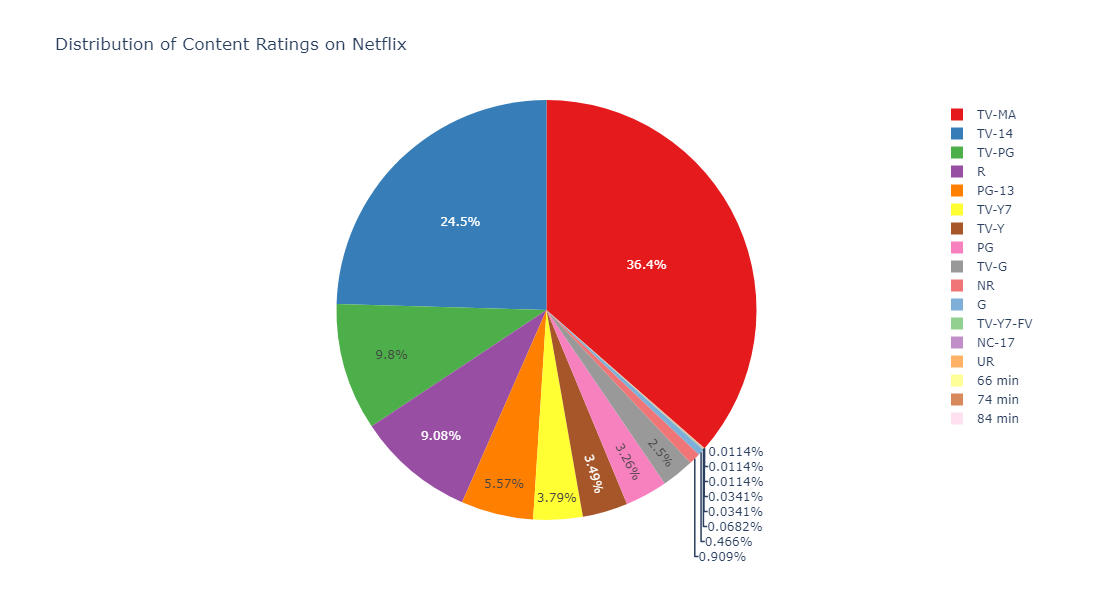

In [35]:
z = categorical.groupby(['rating']).size().reset_index(name='counts')
pieChart = px.pie(z, values='counts', names='rating', 
                  title='Distribution of Content Ratings on Netflix',
                  color_discrete_sequence=px.colors.qualitative.Set1)
pieChart.update_layout(
    autosize=False,
    width=800,  # Set the width of the chart
    height=600,  # Set the height of the chart
)
pieChart.show()
# pieChart.write_image("rating_pie_chart.png")

In [50]:
# img = cv2.imread("../Images/director_bar_chart.png")
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# plt.imshow(img)

The graph above shows that the majority of content on Netflix is categorized as “TV-MA”, which means that most of the content available on Netflix is intended for viewing by mature and adult audiences.

# Top 5 Actors and Directors:

Now let’s see the top 5 successful directors on this platform:

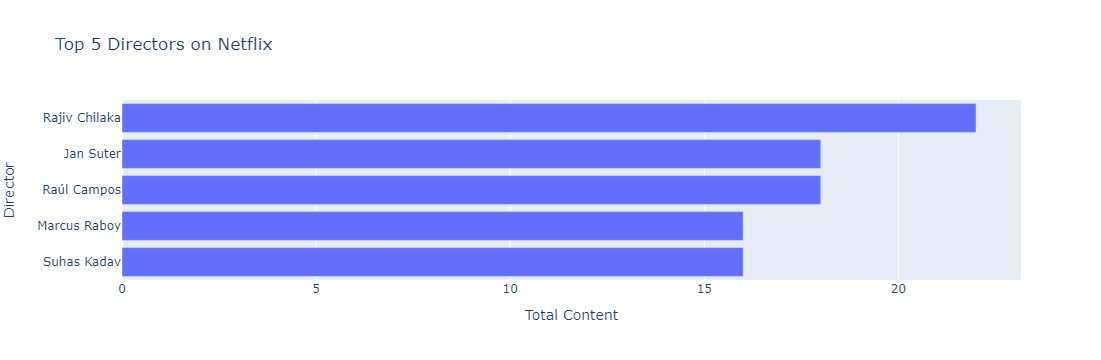

In [36]:
df['director'] = df['director'].fillna('No Director Specified')
filtered_directors = pd.DataFrame()
filtered_directors = df['director'].str.split(',',expand=True).stack()
filtered_directors = filtered_directors.to_frame()
filtered_directors.columns = ['Director']
directors = filtered_directors.groupby(['Director']).size().reset_index(name='Total Content')
directors = directors[directors.Director !='No Director Specified']
directors = directors.sort_values(by = ['Total Content'],ascending=False)
directorsTop5 = directors.head()
directorsTop5 = directorsTop5.sort_values(by=['Total Content'])
fig1 = px.bar(directorsTop5,x='Total Content',y='Director',title='Top 5 Directors on Netflix')
fig1.show()
# pieChart.write_image("director_bar_chart.png")

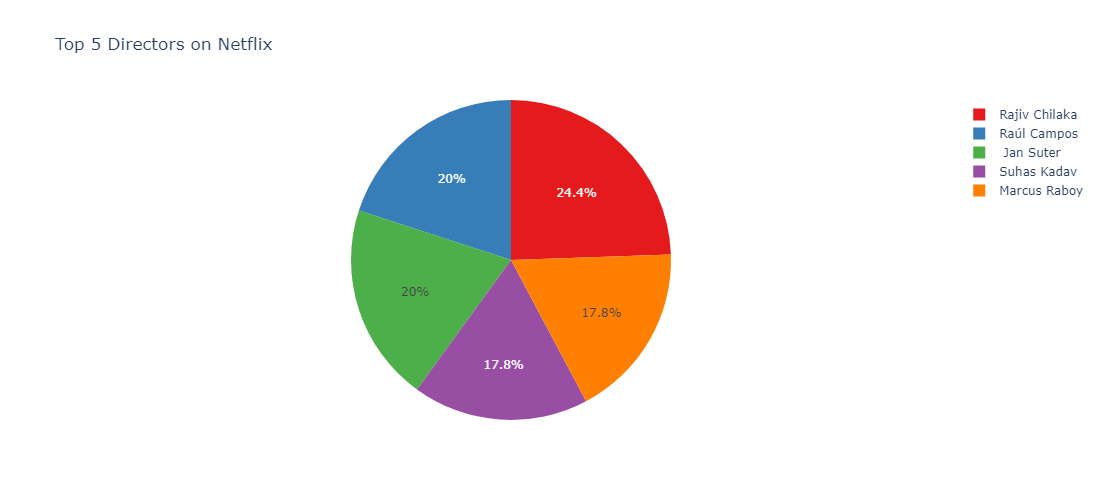

In [37]:
pieChart = px.pie(directorsTop5, values='Total Content', names='Director', 
                  title='Top 5 Directors on Netflix',
                  color_discrete_sequence=px.colors.qualitative.Set1)
pieChart.update_layout(
    autosize=False,
    width=700,  # Set the width of the chart
    height=500,  # Set the height of the chart
)
pieChart.show()
# pieChart.write_image("directors_pie_chart.png")

From the above graph it is derived that the top 5 directors on this platform are:

        Rajiv Chilaka = 24.4%
        Raul Campos = 20%
        Jan Suter = 20%
        Suhas Kadav = 17.8%
        Marcus Raboy = 17.8%

### Now let’s have a look at the top 5 successful actors on this platform:

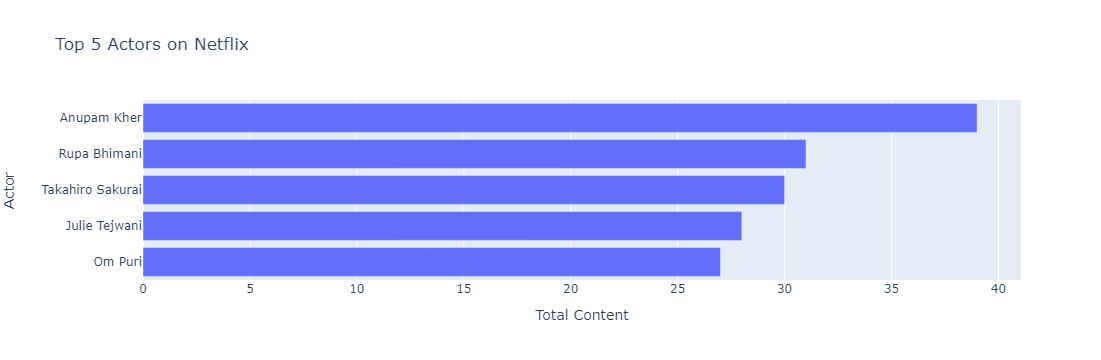

In [38]:
df['cast']=df['cast'].fillna('No Cast Specified')
filtered_cast=pd.DataFrame()
filtered_cast=df['cast'].str.split(',',expand=True).stack()
filtered_cast=filtered_cast.to_frame()
filtered_cast.columns=['Actor']
actors=filtered_cast.groupby(['Actor']).size().reset_index(name='Total Content')
actors=actors[actors.Actor !='No Cast Specified']
actors=actors.sort_values(by=['Total Content'],ascending=False)
actorsTop5=actors.head()
actorsTop5=actorsTop5.sort_values(by=['Total Content'])
fig2=px.bar(actorsTop5,x='Total Content',y='Actor', title='Top 5 Actors on Netflix')
fig2.show()
# pieChart.write_image("bar_actor_chart.png")

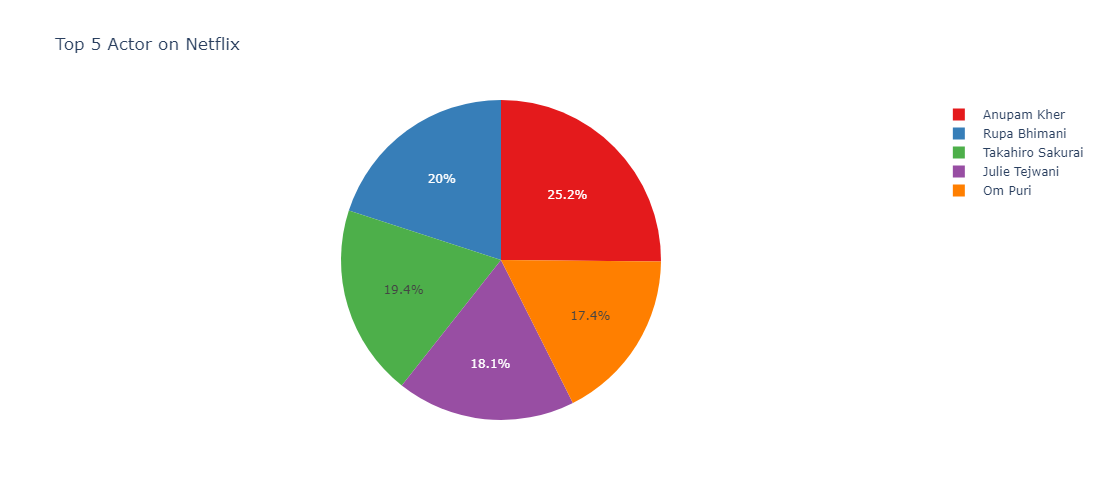

In [39]:
pieChart = px.pie(actorsTop5, values='Total Content', names='Actor', 
                  title='Top 5 Actor on Netflix',
                  color_discrete_sequence=px.colors.qualitative.Set1)
pieChart.update_layout(
    autosize=False,
    width=700,  # Set the width of the chart
    height=500,  # Set the height of the chart
)
pieChart.show()
# pieChart.write_image("pie_actor_chart.png")

From the above plot, it is derived that the top 5 actors on Netflix are:

        Anupam Kher = 25.2%
        Rupa Bhimani = 20%
        Takahiro Sakurai = 19.4%
        Julie Tejwani = 18.1%
        om Puri = 17.4%

### Analyzing Content on Netflix:

The next thing to analyze from this data is the trend of production over the years on Netflix:

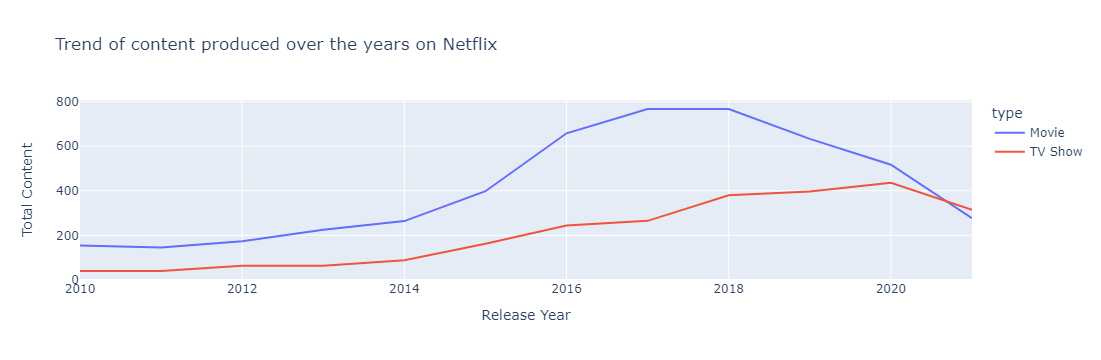

In [40]:
df1=df[['type','release_year']]
df1=df1.rename(columns={"release_year": "Release Year"})
df2=df1.groupby(['Release Year','type']).size().reset_index(name='Total Content')
df2=df2[df2['Release Year']>=2010]
fig3 = px.line(df2, x="Release Year", y="Total Content", color='type',title='Trend of content produced over the years on Netflix')
fig3.show()
# pieChart.write_image("line_type_chart.png")

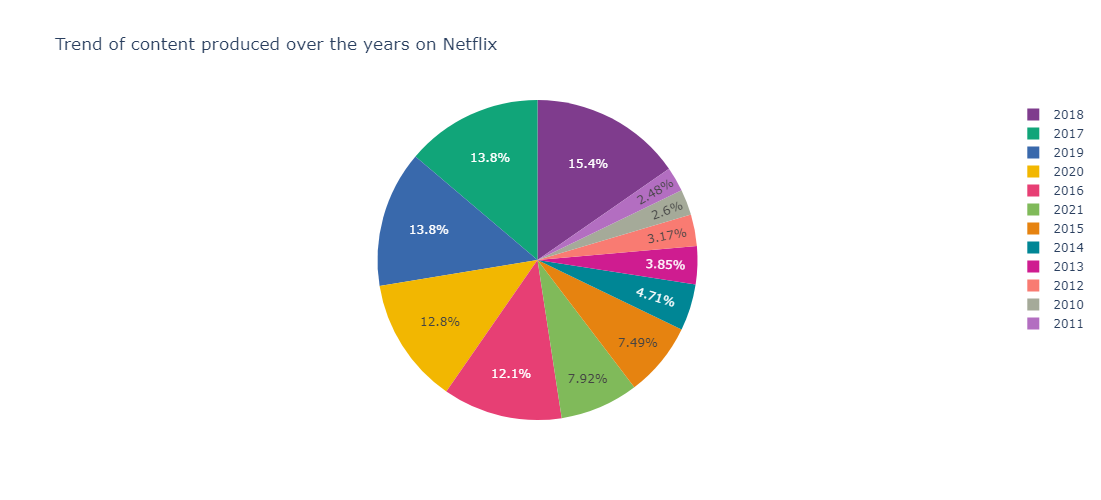

In [41]:
df1=df[['type','release_year']]
df1=df1.rename(columns={"release_year": "Release Year"})
df2=df1.groupby(['Release Year','type']).size().reset_index(name='Total Content')
df2=df2[df2['Release Year']>=2010]

pieChart = px.pie(df2, values='Total Content', names= 'Release Year',
                  title='Trend of content produced over the years on Netflix',
                  color_discrete_sequence=px.colors.qualitative.Bold)
pieChart.update_layout(
    autosize = False,
    width = 700,
    height = 500
)

pieChart.show()
# pieChart.write_image("pie_type_chart.png")

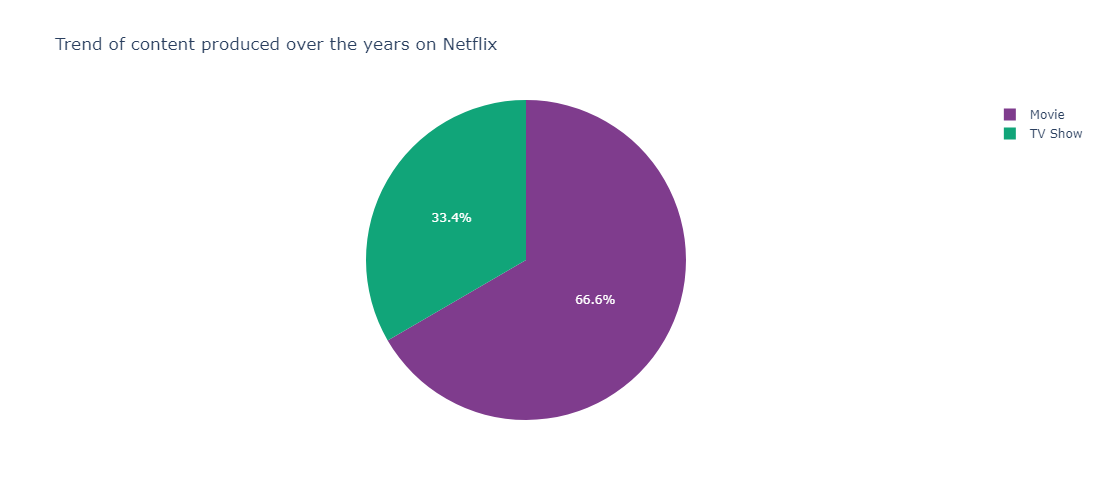

In [42]:
df1=df[['type','release_year']]
df1=df1.rename(columns={"release_year": "Release Year"})
df2=df1.groupby(['Release Year','type']).size().reset_index(name='Total Content')
df2=df2[df2['Release Year']>=2010]

pieChart = px.pie(df2, values='Total Content', names= 'type',
                  title='Trend of content produced over the years on Netflix',
                  color_discrete_sequence=px.colors.qualitative.Bold)
pieChart.update_layout(
    autosize = False,
    width = 700,
    height = 500
)

pieChart.show()
# pieChart.write_image("pie_type2_chart.png")

The above line graph shows that there has been a decline in the production of the content for both movies and other shows since 2018.

At last, to conclude our analysis, I will analyze the sentiment of content on Netflix:

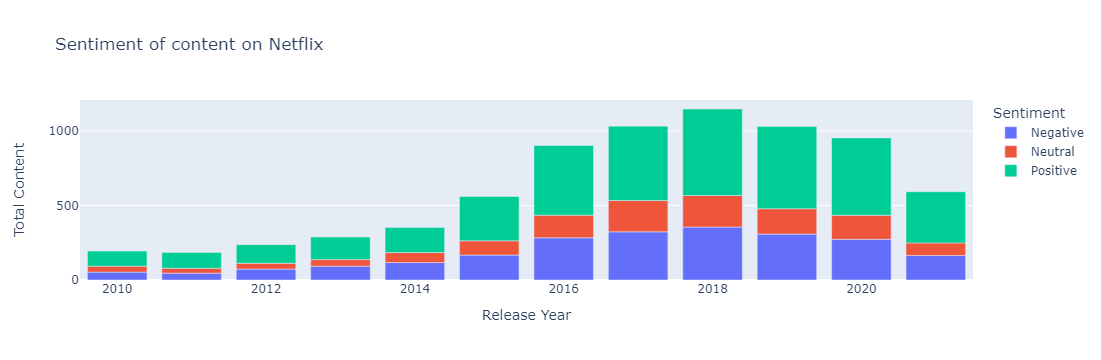

In [43]:
dfx=df[['release_year','description']]
dfx=dfx.rename(columns={'release_year':'Release Year'})
for index,row in dfx.iterrows():
    z=row['description']
    testimonial=TextBlob(z)
    p=testimonial.sentiment.polarity
    if p==0:
        sent='Neutral'
    elif p>0:
        sent='Positive'
    else:
        sent='Negative'
    dfx.loc[[index,2],'Sentiment']=sent


dfx=dfx.groupby(['Release Year','Sentiment']).size().reset_index(name='Total Content')

dfx=dfx[dfx['Release Year']>=2010]
fig4 = px.bar(dfx, x="Release Year", y="Total Content", color="Sentiment", title="Sentiment of content on Netflix")
fig4.show()
pieChart.write_image("bar_last_chart.png")

So the above graph shows that the overall positive content is always greater than the neutral and negative content combined.

I hope you liked this article on a data science project on Netflix Data Analysis with Python programming language. Feel free to ask your valuable questions in the comments section below.